<a href="https://colab.research.google.com/github/Manoj250/ObjectLocalization-detection/blob/main/objectDetectionWithSlidingWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense,Input,Flatten

In [ ]:
!pip install kaggle -q

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojdb","key":"750afa9242bec8541f8850c1e27b32f0"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d prasunroy/natural-images

 99% 338M/342M [00:11<00:00, 39.8MB/s]
100% 342M/342M [00:11<00:00, 30.9MB/s]


In [ ]:
!unzip /content/natural-images.zip

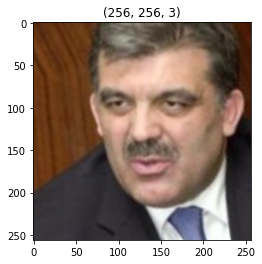

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.asarray(Image.open("/content/natural_images/person/person_0029.jpg"))
plt.title(str(img.shape))
plt.imshow(img)


In [ ]:
import cv2

In [ ]:
from tensorflow.keras.utils import to_categorical

main_cats = os.listdir("/content/natural_images")

x = []
y = []

index=0

for cat in main_cats:
  files = os.listdir(os.path.join("/content/natural_images/",cat))
  for file_ in files:
    try:
      img = Image.open(os.path.join("/content/natural_images/",cat,file_))
      img = np.asarray(img)
      img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      x.append(img)
      y.append(index)
    except Exception as e:
      print(e)
      print("failed"+" "+str(cat)+"/"+str(file_))
  index+=1
    
x = np.array(x)

In [ ]:
x.shape

(6899, 64, 64)

In [ ]:
x = np.expand_dims(x,-1)

In [ ]:
x.shape

(6899, 64, 64, 1)

In [ ]:
y= np.array(y)
y.shape

(6899,)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
x = x.astype("float32")/255.

In [ ]:
y = y.astype("float32")

In [ ]:
y = to_categorical(y)

In [ ]:
np.max(x)

1.0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.core import Dropout

from tensorflow import keras

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics="accuracy")

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

est = EarlyStopping(monitor="val_accuracy",patience=2,mode="auto")

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 55)

#not enough ram so empty x and y after split
x = []
y = []

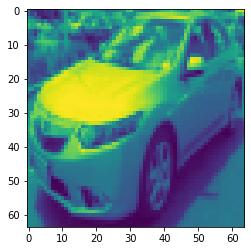

In [ ]:
plt.imshow(x_train[1].squeeze())

In [ ]:
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_test,y_test),callbacks=[est])

Epoch 1/20
151/151 [==============================] - 30s 193ms/step - loss: 0.8399 - accuracy: 0.6929 - val_loss: 0.5949 - val_accuracy: 0.7787
Epoch 2/20
151/151 [==============================] - 29s 192ms/step - loss: 0.4415 - accuracy: 0.8308 - val_loss: 0.4393 - val_accuracy: 0.8483
Epoch 3/20
151/151 [==============================] - 29s 190ms/step - loss: 0.3152 - accuracy: 0.8791 - val_loss: 0.4152 - val_accuracy: 0.8507
Epoch 4/20
151/151 [==============================] - 29s 192ms/step - loss: 0.2374 - accuracy: 0.9116 - val_loss: 0.4259 - val_accuracy: 0.8531
Epoch 5/20
151/151 [==============================] - 29s 190ms/step - loss: 0.1893 - accuracy: 0.9302 - val_loss: 0.3823 - val_accuracy: 0.8734
Epoch 6/20
151/151 [==============================] - 29s 190ms/step - loss: 0.1167 - accuracy: 0.9602 - val_loss: 0.4208 - val_accuracy: 0.8662
Epoch 7/20
151/151 [==============================] - 29s 191ms/step - loss: 0.0975 - accuracy: 0.9669 - val_loss: 0.4578 - val_ac

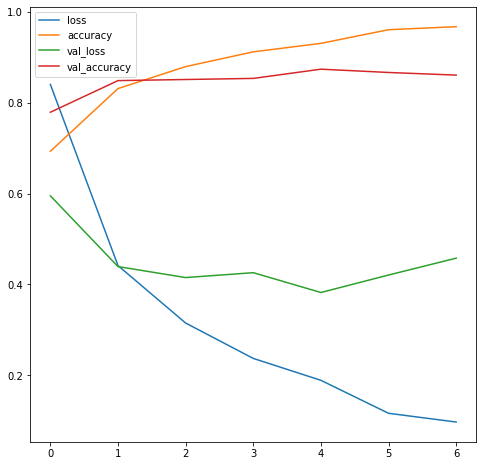

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,8))

In [ ]:
import random

random_img = random.choice(x_test)
result = model.predict(np.expand_dims(random_img,axis=0))
print(result)
index = np.argmax(result[0])
plt.title(main_cats[index])
plt.imshow(random_img.squeeze(),cmap="gray")

In [ ]:
print(main_cats)

['dog', 'motorbike', 'fruit', 'airplane', 'cat', 'car', 'person', 'flower']


In [ ]:
model.save("natural_images_classifier.h5")

In [44]:
from keras.models import load_model

model = load_model("natural_images_classifier.h5")

In [69]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [68]:
def sliding_window(image,windowsize):
  for x in range(0,image.shape[0]-windowsize,8):
    for y in range(0,image.shape[1]-windowsize,8):
      yield (x,y,image[x:x+windowsize,y:y+windowsize])

In [48]:
pip install wget -q

In [70]:
def image_pyramid(image,windowsize):
  yield image
  while 1:
    image = cv2.resize(image, None, fx= 0.8, fy= 0.8, interpolation= cv2.INTER_AREA)
    if image.shape[0] < windowsize or image.shape[1] < windowsize:
      break  
    yield image                       

In [88]:
def controller(image):
  roi = []
  co = []
  
  for im in image_pyramid(image,256):
    scale = image.shape[0]/im.shape[0]
    for x,y,window in sliding_window(im,256):
      x_original = x*scale
      y_original = y*scale
      h = window.shape[0]
      w = window.shape[1]
      refined = cv2.resize(window,(64,64),interpolation = cv2.INTER_AREA)
      refined = cv2.cvtColor(refined,cv2.COLOR_BGR2GRAY )
      refined = np.expand_dims(refined,-1)
      refined = refined.astype("float32")/255.
      roi.append(refined)
      co.append((x_original,y_original,x_original+w,y_original+h))
  return np.array(roi),co

In [92]:
from imutils.object_detection import non_max_suppression
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow

def draw(predicted,original_image):
	for label in predicted.keys():
		final_boxes = np.array([p[0] for p in predicted[label]])
		final_prob = np.array([p[1] for p in predicted[label]])
		boxes = non_max_suppression(final_boxes, final_prob)
		for (x1,y1,x2,y2) in boxes:
			original_image = cv2.rectangle(original_image, (x1, y1), (x2,y2),(255,173,0), 2)
			y = y1 - 10 if y1 - 10 > 10 else y1 + 10
			original_image = cv2.putText(original_image,label, (x1, y),cv2.FONT_HERSHEY_SIMPLEX, 1,(210,39,48), 2)
	return original_image


In [75]:
def main(path):
  main_cats = ['dog', 'motorbike', 'fruit', 'airplane', 'cat', 'car', 'person', 'flower']
  predicted_labels = {}
  roi,co = controller(np.asarray(Image.open(path)))
  predictions = model.predict(roi)
  for count,prediction in enumerate(predictions):
    if(prediction[np.argmax(prediction)]>0.90 and main_cats[np.argmax(prediction)] == 'person'):
      bbox = co[count]
      label = main_cats[np.argmax(prediction)]
      all_bbox_and_prob_for_one_label = predicted_labels.get(label,[])
      all_bbox_and_prob_for_one_label.append((bbox,prediction[np.argmax(prediction)]))
      predicted_labels[label] = all_bbox_and_prob_for_one_label
  result = draw(predicted_labels,np.asarray(Image.open(path)))
  return result

In [86]:
import wget

wget.download("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.ZvhKspKtt9hHUJUbjK0g4AHaLH%26pid%3DApi&f=1","image.jpg")

'image.jpg'

enter path for the image:/content/image.jpg
total time taken is 2.808382034301758


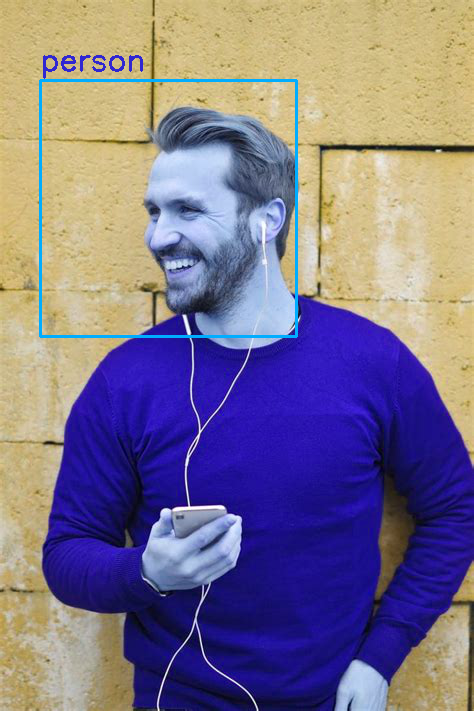

In [93]:
import time

path = input("enter path for the image:")
start = time.time() 
result = main(path)
end = time.time()
total = end-start
print("total time taken is "+str(total))
cv2_imshow(result)